# Individual Project 3
--- 
**Author:** Jaylon Kiper  
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**
    
The goal of this project is to use some of the features/functions provided by the Python Pandas library to clean
up a data set and then visualize it with Pandas/Matplotlib/Seaborn.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline
import datetime as dt
from datetime import timedelta

## Part 1
1. You have been given four .csv files. Each file represents a different German power company’s wind turbine
power generation data. Your first goal is to merge these datasets together. To do this, write a function that
takes a filename (of and returns a dataframe. Your function should do the following:

a. Convert the Date column to a date (notice, the data are in d/m/y format – take that into consider
when you convert.

b. Since none of the files have a column for company, you need to add one called Company that
contains the Company name (you can extract this from .csv filename. Hint: dataframes have an
insert function.

In [2]:
def get_file(files):
    df = pd.read_csv(files)
    files = files.split('.')
    df.Date = pd.to_datetime(df.Date, dayfirst = True)
    df.insert(0, "Company", files[0])
    return df

2. Execute your function four times, passing each file to it. Once complete, you will have four dataframes that
you can merge.

In [3]:
her = get_file("50Hertz.csv")
ampr = get_file("Amprion.csv")
tnet = get_file("TenneTTSO.csv")
transbw = get_file("TransnetBW.csv")

3. Stack the dataframes on top of each to produce one large dataframe that has 98 columns, one for company,
one for date and one for each timepoint.

In [4]:
df = pd.concat([her,ampr,tnet,transbw])
df

,Company,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,50Hertz,2019-08-23,74.00,73.00,63.00,55.00,54.00,53.00,51.00,52.00,...,68.00,68.00,63.00,61.00,57.00,52.00,51.00,49.00,45.00,40.00
1,50Hertz,2019-08-24,37.00,38.00,35.00,35.00,31.00,32.00,30.00,29.00,...,118.00,118.00,112.00,107.00,104.00,104.00,99.00,95.00,95.00,96.00
2,50Hertz,2019-08-25,93.00,88.00,85.00,81.00,76.00,80.00,81.00,76.00,...,111.00,108.00,103.00,96.00,93.00,88.00,86.00,82.00,80.00,77.00
3,50Hertz,2019-08-26,72.00,66.00,59.00,54.00,48.00,46.00,45.00,43.00,...,48.00,47.00,47.00,46.00,47.00,49.00,50.00,51.00,48.00,42.00
4,50Hertz,2019-08-27,39.00,38.00,36.00,36.00,34.00,31.00,31.00,30.00,...,54.00,53.00,51.00,52.00,51.00,52.00,54.00,54.00,56.00,59.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,TransnetBW,2020-09-18,43.00,44.43,44.33,46.67,46.67,46.67,47.44,45.50,...,41.56,38.44,38.44,36.75,37.57,41.11,40.00,39.86,39.89,37.50
393,TransnetBW,2020-09-19,37.43,35.22,36.60,33.44,32.67,36.00,34.00,30.89,...,6.67,7.56,6.78,7.56,7.56,7.33,6.56,6.56,5.78,5.00
394,TransnetBW,2020-09-20,5.00,5.00,5.00,5.00,4.22,4.22,4.00,4.78,...,7.00,6.00,6.67,8.33,6.78,5.22,4.44,2.67,2.67,2.67
395,TransnetBW,2020-09-21,3.44,3.44,3.44,3.44,2.67,3.44,1.67,2.44,...,5.71,6.56,5.60,4.71,4.00,3.29,2.33,2.25,2.22,1.33


4. You are going to visualize aggregate data first. To start, you need to create a new dataframe that is grouped
by Company and the year (e.g. 50Hertz 2019, 50Hertz 2020, etc.). You can group by multiple columns by
putting the column list in []. Group by the mean() function.

In [5]:
df = df.groupby(['Company', df.Date.dt.year]).mean()
df

00:00:00    00:15:00    00:30:00    00:45:00    01:00:00  \
Company    Date                                                               
50Hertz    2019  143.320611  142.351145  142.366412  142.000000  141.900763   
           2020  141.894737  141.124060  140.936090  140.838346  140.281955   
Amprion    2019  106.992366  106.679389  106.091603  105.549618  108.083969   
           2020   93.751880   94.312030   94.424812   94.033835   93.657895   
TenneTTSO  2019  150.866183  150.450992  150.152901  149.611679  148.946412   
           2020  141.603835  141.457105  141.203120  141.206278  140.931617   
TransnetBW 2019   39.293740   39.462290   39.165191   39.138321   39.369084   
           2020   30.899023   30.604737   30.354023   29.871128   29.731955   

                   01:15:00    01:30:00    01:45:00    02:00:00    02:15:00  \
Company    Date                                                               
50Hertz    2019  141.381679  140.648855  140.923664  140.732824  140.458015   
           2020  140.037594  139.462406  139.112782  138.646617  138.560150   
Amprion    2019  108.282443  108.129771  107.465649  107.282443  106.671756   
           2020   93.563910   93.146617   92.812030   92.571429   92.127820   
TenneTTSO  2019  148.629847  148.808473  148.620382  148.236031  147.931298   
           2020  140.642105  140.583008  140.537632  140.579962  140.784511   
TransnetBW 2019   39.028779   38.834580   38.684504   38.211145   38.427099   
           2020   29.642481   29.409511   29.432857   29.453045   29.410301   

                 ...    21:30:00    21:45:00    22:00:00    22:15:00  \
Company    Date  ...                                                   
50Hertz    2019  ...  144.328244  144.839695  144.709924  144.641221   
           2020  ...  147.590226  147.214286  147.075188  146.661654   
Amprion    2019  ...  115.412214  114.572519  114.076336  112.961832   
           2020  ...   96.515038   96.338346   96.368421   96.379699   
TenneTTSO  2019  ...  152.761908  152.608015  152.675802  152.765115   
           2020  ...  145.523571  144.793947  144.206466  143.894850   
TransnetBW 2019  ...   38.739847   38.871527   38.754275   38.998473   
           2020  ...   31.489662   31.425075   31.569248   31.510526   

                   22:30:00    22:45:00    23:00:00    23:15:00    23:30:00  \
Company    Date                                                               
50Hertz    2019  144.442748  144.274809  144.954198  144.206107  144.076336   
           2020  145.609023  144.624060  143.864662  143.680451  143.112782   
Amprion    2019  112.595420  112.427481  111.343511  110.946565  110.328244   
           2020   96.176692   94.898496   95.018797   94.973684   94.691729   
TenneTTSO  2019  152.631374  152.897176  152.363740  152.357405  152.236565   
           2020  143.764248  143.694135  143.535902  142.563008  142.350075   
TransnetBW 2019   39.014733   39.522290   39.187099   39.421832   39.499924   
           2020   31.356391   31.330113   31.271917   30.962932   30.978346   

                   23:45:00  
Company    Date              
50Hertz    2019  144.259542  
           2020  142.338346  
Amprion    2019  107.473282  
           2020   94.383459  
TenneTTSO  2019  151.705496  
           2020  141.976128  
TransnetBW 2019   39.299924  
           2020   30.907481  

[8 rows x 96 columns]

5. The first plot you want to make is horizontal bar chart that shows the average amount of power generated
by each company, in each year for midnight and another bar graph that shows the same for noon. To this:

a. Write the code to extract a dataframe for each time point (00:00:00 and 12:00:00) and put them in
their own objects name midnight and noon. When you have done this you will have two Pandas
Series that look like below.

b. Write the code to create a horizontal bar chart for each dataset that look the those below. Note:
These are two separate charts, they are not subplots.

c. Save each chart separately.

In [6]:
midnight = df.get("00:00:00")
midnight

Company     Date
50Hertz     2019    143.320611
            2020    141.894737
Amprion     2019    106.992366
            2020     93.751880
TenneTTSO   2019    150.866183
            2020    141.603835
TransnetBW  2019     39.293740
            2020     30.899023
Name: 00:00:00, dtype: float64

In [7]:
noon = df.get("12:00:00")
noon

Company     Date
50Hertz     2019    142.473282
            2020    163.398496
Amprion     2019    100.572519
            2020    101.357143
TenneTTSO   2019    149.229466
            2020    162.944436
TransnetBW  2019     37.772366
            2020     25.731053
Name: 12:00:00, dtype: float64

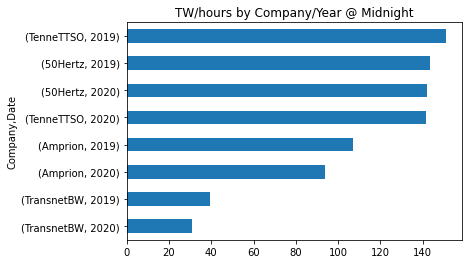

In [8]:
plt.title('TW/hours by Company/Year @ Midnight')
midnight_plot = midnight.sort_values().plot(kind = 'barh')
plt.savefig('midnight.png')

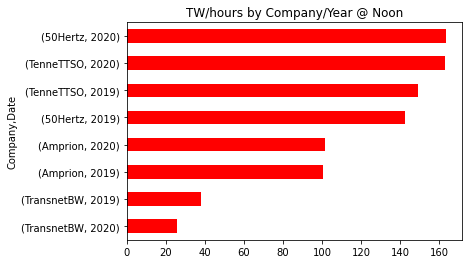

In [9]:
plt.title('TW/hours by Company/Year @ Noon')
noon_plot = noon.sort_values().plot(kind = 'barh', color = 'red')
plt.savefig('noon.png')

6. You have been asked to combine the two bar graphs into a single graph that shares the x-axis. And, it will
be published in newspaper in grayscale, so the top graph should be silver and the bottom should be gray.
Save the file as ‘combined_bar_chart.png’.

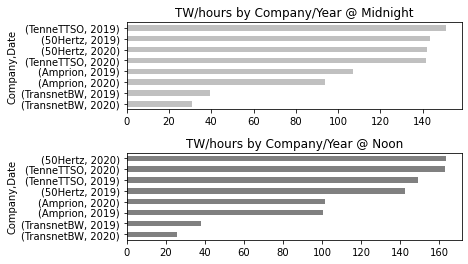

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

midnight.sort_values().plot(kind = 'barh',title = 'TW/hours by Company/Year @ Midnight', ax = ax1, color = 'silver')
noon.sort_values().plot(kind = 'barh',title = 'TW/hours by Company/Year @ Noon', ax = ax2, color = 'grey')

fig.savefig('combined_bar_chart.png')

7. You have been asked to write a function that accepts the ungrouped dataframe, the company name, date,
and a plotting color that generates an area graph for that particular company/day. Use this function
signature: daily_view(dataframe, company, date, color).

In [170]:
def daily_view(dataframe, company, date, color):
    df2 = pd.read_csv(dataframe)
    company = dataframe.split('.')[0]
    df2.Date = pd.to_datetime(df2.Date, yearfirst = True)
    date = df2.Date
    
    x = df2[1:160]
    
    plt.plot(x,color = 'purple')
    plt.title('Power Production: {}/{}'.format(company, date))
    plt.xlabel('Time of Day')
    plt.ylabel('TW/h Generated')
    plt.show()

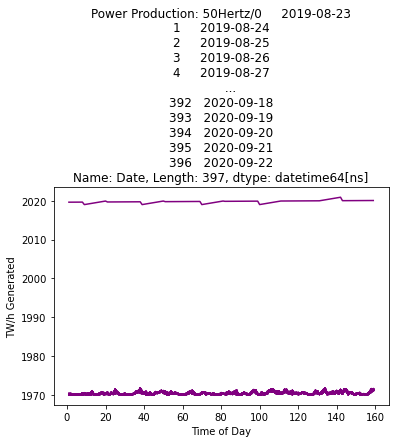

In [171]:
daily_view('50Hertz.csv',"50Hertz","2019-08-24", "purple")

## Part 2
In class we looked at several data sets provided by Seaborn including fmri, flights, and mpg. Using one or more of
the other data sets besides (fmri, flights, mpg and penguin) generate examples of the following plots:
1. Line Chart
2. Box/Whisker
3. Histograms and Kernel Density
4. Heatmap
5. Seaborn Pair Plot

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [12]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


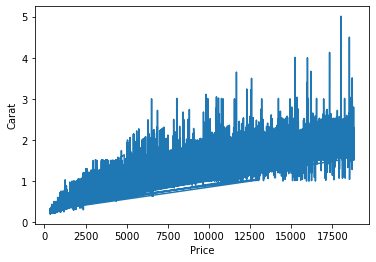

In [13]:
#Line Chart
x = diamonds.price
y = diamonds.carat

plt.plot(x, y)
plt.xlabel('Price')
plt.ylabel('Carat')
plt.show()

In [14]:
geyser = sns.load_dataset('geyser')
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


{'whiskers': [<matplotlib.lines.Line2D at 0x2a6482add60>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6482bb460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6482ada00>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6482bbb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6482bbe80>],
 'means': []}

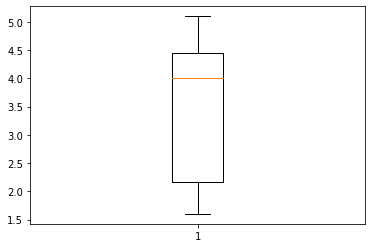

In [15]:
#Box/Whisker Plot
plt.boxplot(geyser.duration)

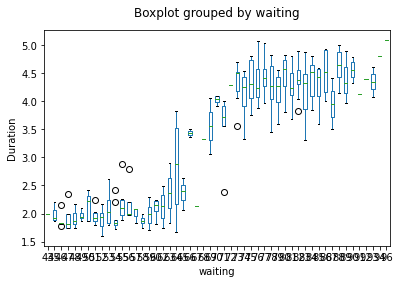

In [16]:
bxw = geyser.boxplot(column = 'duration', by = 'waiting')
bxw.set_title('')
bxw.set_ylabel('Duration')
bxw.grid(False)

(array([ 4., 32., 22., 10., 13., 10.,  1.,  2.,  1.,  2.,  1.,  0.,  5.,
         3.,  7., 11., 10., 20., 19., 21., 27., 19., 19.,  9.,  4.]),
 array([1.6 , 1.74, 1.88, 2.02, 2.16, 2.3 , 2.44, 2.58, 2.72, 2.86, 3.  ,
        3.14, 3.28, 3.42, 3.56, 3.7 , 3.84, 3.98, 4.12, 4.26, 4.4 , 4.54,
        4.68, 4.82, 4.96, 5.1 ]),
 <BarContainer object of 25 artists>)

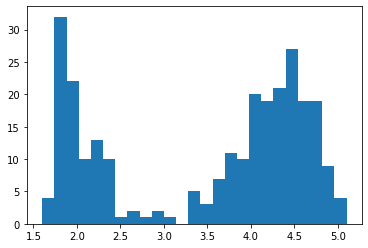

In [17]:
#Histogram
plt.hist(geyser.duration, bins = 25)

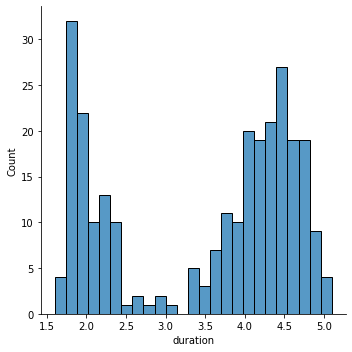

In [18]:
sns.displot(geyser.duration, bins = 25)

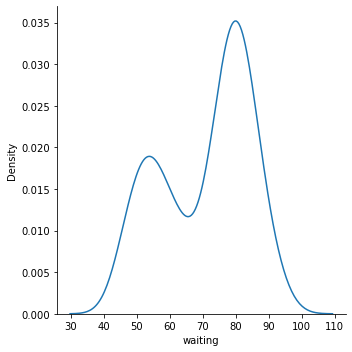

In [19]:
#Kernel Density Plot
sns.displot(geyser.waiting, kind = 'kde')

<AxesSubplot:xlabel='attnr', ylabel='subidr'>

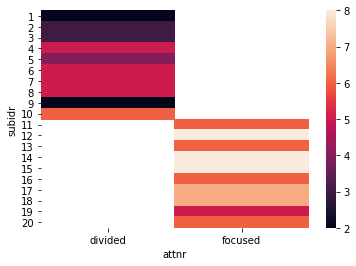

In [20]:
#Heatmaps
anagrams = sns.load_dataset('anagrams')
anagrams = anagrams.pivot("subidr","attnr","num1")
sns.heatmap(anagrams)

In [21]:
#Seaborn Pairplot
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


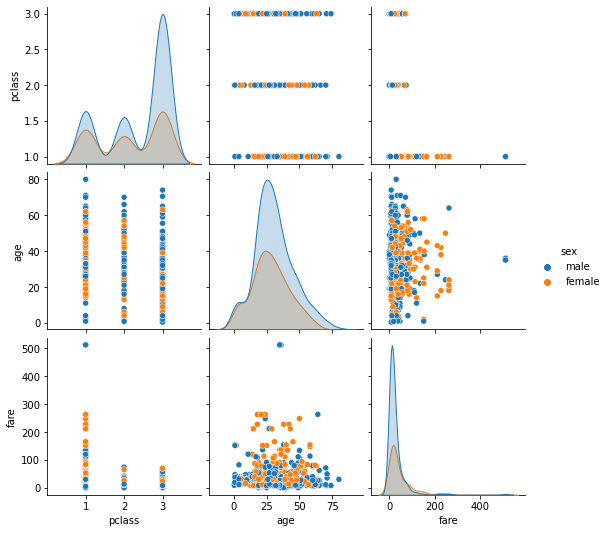

In [22]:
sns.pairplot(titanic[['pclass', 'sex', 'age', 'fare' ]], hue = 'sex')